In [1]:
import bt
import talib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
price_data=bt.get('aapl',start='2022-01-22',end='2024-04-12')

[*********************100%%**********************]  1 of 1 completed


In [3]:
price_data.columns=['bt_strategy']

In [4]:
EMA_Short=talib.EMA(price_data['bt_strategy'],timeperiod=10).to_frame()
EMA_Long=talib.EMA(price_data['bt_strategy'],timeperiod=40).to_frame()

In [5]:
signal = EMA_Long.copy()
signal[EMA_Long.isnull()]=0

In [6]:
signal[EMA_Short>EMA_Long]=1
signal[EMA_Short<EMA_Long]=-1

In [7]:
signal.columns=['bt_strategy']

<Axes: xlabel='Date'>

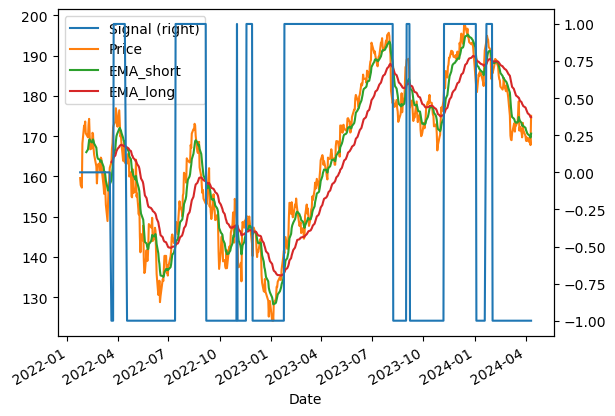

In [8]:
combined_df=bt.merge(signal,price_data,EMA_Short,EMA_Long)
combined_df.columns=['Signal','Price','EMA_short','EMA_long']
combined_df.plot(secondary_y=['Signal'])

In [9]:
bt_strategy=bt.Strategy('EMA Crossover',
                        [bt.algos.WeighTarget(signal),
                         bt.algos.Rebalance()])

In [10]:
bt_backtest=bt.Backtest(bt_strategy,price_data)
bt_result=bt.run(bt_backtest)

<Axes: title={'center': 'Backtest Result'}>

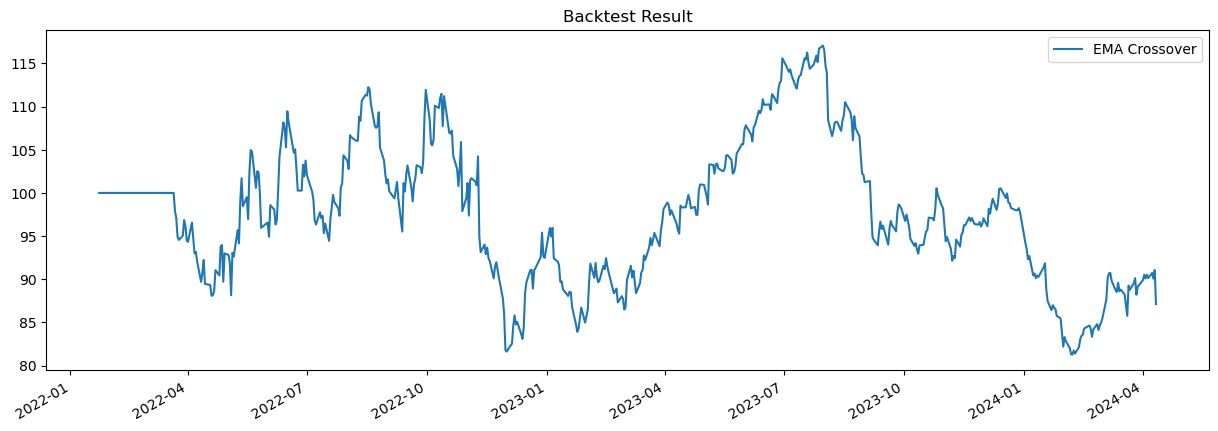

In [11]:
bt_result.plot(title='Backtest Result')

In [12]:
bt_strategy

<Strategy EMA Crossover>

In [13]:
combined_df

,Signal,Price,EMA_short,EMA_long
Date,,,,
2022-01-24,0.0,159.590576,NaN,NaN
2022-01-25,0.0,157.773697,NaN,NaN
2022-01-26,0.0,157.684814,NaN,NaN
2022-01-27,0.0,157.220734,NaN,NaN
2022-01-28,0.0,168.191223,NaN,NaN
...,...,...,...,...
2024-04-05,-1.0,169.580002,170.515278,175.676614
2024-04-08,-1.0,168.449997,170.139773,175.324097
2024-04-09,-1.0,169.669998,170.054359,175.048287


In [14]:
resInfo=bt_result.stats

In [15]:
print (resInfo.index)

Index(['start', 'end', 'rf', 'total_return', 'cagr', 'max_drawdown', 'calmar',
       'mtd', 'three_month', 'six_month', 'ytd', 'one_year', 'three_year',
       'five_year', 'ten_year', 'incep', 'daily_sharpe', 'daily_sortino',
       'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 'best_day',
       'worst_day', 'monthly_sharpe', 'monthly_sortino', 'monthly_mean',
       'monthly_vol', 'monthly_skew', 'monthly_kurt', 'best_month',
       'worst_month', 'yearly_sharpe', 'yearly_sortino', 'yearly_mean',
       'yearly_vol', 'yearly_skew', 'yearly_kurt', 'best_year', 'worst_year',
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month',
       'win_year_perc', 'twelve_month_win_perc'],
      dtype='object')


In [16]:
print ('Daily return: %.4f'% resInfo.iloc['daily_mean'])

Daily return: -0.0260


C:\Users\Clari\AppData\Local\Temp\ipykernel_34256\1900160954.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ('Daily return: %.4f'% resInfo.loc['daily_mean'])


In [25]:
resInfo.index.get_loc('cagr')

4

In [18]:
print ('Daily return: %.4f'% resInfo.iloc[18])

Daily return: -0.0260


C:\Users\Clari\AppData\Local\Temp\ipykernel_34256\4225164701.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ('Daily return: %.4f'% resInfo.iloc[18])


In [19]:
print (resInfo.iloc[18])

EMA Crossover   -0.025966
Name: daily_mean, dtype: object


In [22]:
print ('Monthly return: %.4f'% resInfo.iloc[26])

Monthly return: -0.0235


C:\Users\Clari\AppData\Local\Temp\ipykernel_34256\351444405.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ('Monthly return: %.4f'% resInfo.iloc[26])


In [24]:
print ('yearly return: %.4f'% resInfo.iloc[34])

yearly return: -0.0258


C:\Users\Clari\AppData\Local\Temp\ipykernel_34256\24608348.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print ('yearly return: %.4f'% resInfo.iloc[34])


In [26]:
print('Compound annual growth rate: %.4f' %resInfo.iloc[4])

Compound annual growth rate: -0.0603


C:\Users\Clari\AppData\Local\Temp\ipykernel_34256\268872568.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Compound annual growth rate: %.4f' %resInfo.iloc[4])


Text(0.5, 0.98, 'weekly Return Histogram Matrix')

<Figure size 640x480 with 0 Axes>

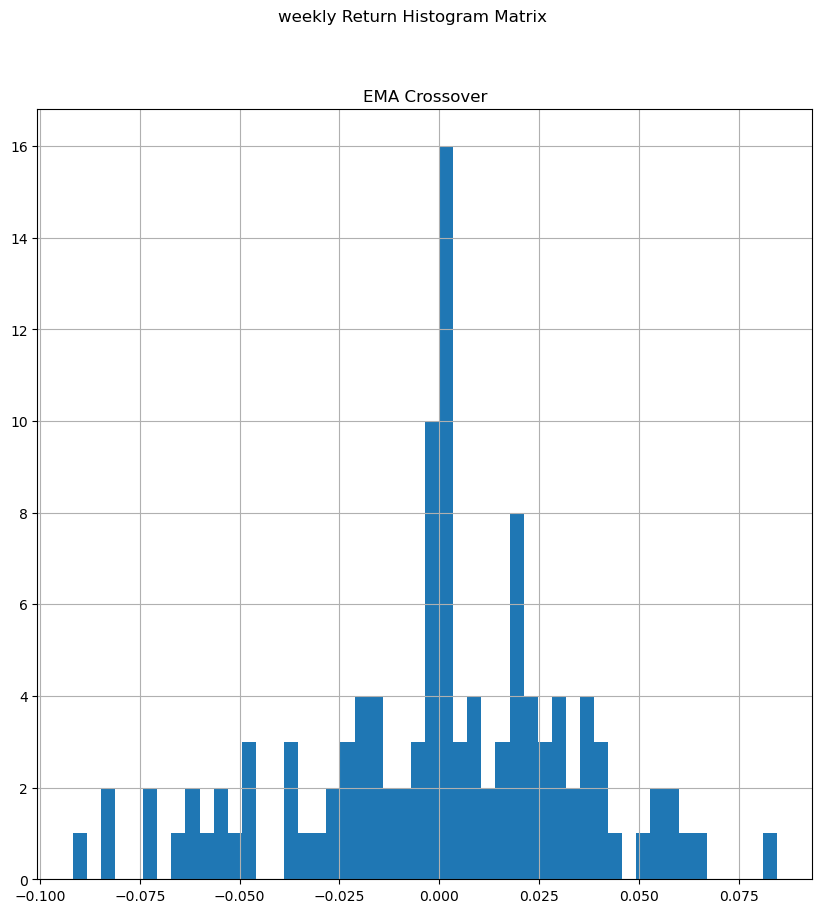

In [28]:
bt_result.plot_histograms(bins=50,freq='w')